In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import os

# Importing necessary classes for data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Importing functions for evaluating model performance
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Importing functions for data splitting and training models
from sklearn.model_selection import train_test_split

# Importing various machine learning algorithms
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

Step 1: Data Preparation

In [2]:
# Read the dataset
dns = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\dns.csv")
ldap = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\ldap.csv")
mssql = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\mssql.csv")
netbios = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\netBIOS.csv")
ntp = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\ntp.csv")
snmp = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\snmp.csv")
ssdp = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\ssdp.csv")
syn = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\syn.csv")
tftp = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\tftp.csv")
udp = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\udp.csv")
udplag = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\udplag.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_9716\3671585275.py:2: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  dns = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\dns.csv")
C:\Users\user\AppData\Local\Temp\ipykernel_9716\3671585275.py:3: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  ldap = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\ldap.csv")
C:\Users\user\AppData\Local\Temp\ipykernel_9716\3671585275.py:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  mssql = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\mssql.csv")
C:\Users\user\AppData\Local\Temp\ipykernel_9716\3671585275.py:5: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  netbios = pd.read_csv("C:\\Users\\user\\Documents\\jupy

In [3]:
# Displaying concise information about the dataset
datasets = ["dns", "ldap", "mssql", "netbios", "ntp", "snmp", "ssdp", "syn", "tftp", "udp", "udplag"]

data = {}

for dataset_name in datasets:
    file_path = f"C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\{dataset_name}.csv"
    data[dataset_name] = pd.read_csv(file_path)
    print(f"{dataset_name}.shape:", data[dataset_name].shape)

C:\Users\user\AppData\Local\Temp\ipykernel_9716\3937859488.py:8: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


dns.shape: (40000, 89)


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3937859488.py:8: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


ldap.shape: (40000, 89)


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3937859488.py:8: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


mssql.shape: (40000, 89)


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3937859488.py:8: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


netbios.shape: (40000, 89)


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3937859488.py:8: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


ntp.shape: (40000, 89)


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3937859488.py:8: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


snmp.shape: (40000, 89)


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3937859488.py:8: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


ssdp.shape: (40000, 89)
syn.shape: (40000, 89)


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3937859488.py:8: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


tftp.shape: (40000, 89)


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3937859488.py:8: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


udp.shape: (40000, 89)
udplag.shape: (40000, 89)


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3937859488.py:8: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


In [4]:
import pandas as pd
from IPython.display import display

datasets = ["dns", "ldap", "mssql", "netbios", "ntp", "snmp", "ssdp", "syn", "tftp", "udp", "udplag"]

data = {}

for dataset_name in datasets:
    file_path = f"C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\{dataset_name}.csv"
    data[dataset_name] = pd.read_csv(file_path)
    print(f"{dataset_name}.head(n=5):")
    display(data[dataset_name].head())

dns.head(n=5):


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3653216687.py:10: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,51:39.8,28415,...,0.0,0,0,0.0,0.0,0,0,0,1,DrDoS_DNS
1,1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,51:39.8,2,...,0.0,0,0,0.0,0.0,0,0,0,0,DrDoS_DNS
2,2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,51:39.9,48549,...,0.0,0,0,0.0,0.0,0,0,0,1,DrDoS_DNS
3,3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,51:39.9,48337,...,0.0,0,0,0.0,0.0,0,0,0,1,DrDoS_DNS
4,4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,51:39.9,32026,...,0.0,0,0,0.0,0.0,0,0,0,1,DrDoS_DNS


ldap.head(n=5):


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3653216687.py:10: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,21010,172.16.0.5-192.168.50.1-0-0-0,172.16.0.5,0,192.168.50.1,0,0,2018-12-01 11:22:40.254769,9141643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
1,1,20932,172.16.0.5-192.168.50.1-900-1808-17,172.16.0.5,900,192.168.50.1,1808,17,2018-12-01 11:22:40.255361,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
2,2,27876,172.16.0.5-192.168.50.1-900-58766-17,172.16.0.5,900,192.168.50.1,58766,17,2018-12-01 11:22:40.255568,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
3,3,24270,172.16.0.5-192.168.50.1-900-35228-17,172.16.0.5,900,192.168.50.1,35228,17,2018-12-01 11:22:40.256113,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
4,4,5109,172.16.0.5-192.168.50.1-900-44969-17,172.16.0.5,900,192.168.50.1,44969,17,2018-12-01 11:22:40.256285,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP


mssql.head(n=5):


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3653216687.py:10: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,139,172.16.0.5-192.168.50.1-0-0-0,172.16.0.5,0,192.168.50.1,0,0,2018-12-01 11:32:32.915441,119151083,...,2.853681e+07,67834732.0,4024278.0,5975510.0,98.183502,5975622.0,5975358.0,0,1,DrDoS_MSSQL
1,1,38385,172.16.0.5-192.168.50.1-850-20345-17,172.16.0.5,850,192.168.50.1,20345,17,2018-12-01 11:32:32.915442,1,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL
2,2,27033,172.16.0.5-192.168.50.1-851-21631-17,172.16.0.5,851,192.168.50.1,21631,17,2018-12-01 11:32:32.915578,1,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL
3,3,34348,172.16.0.5-192.168.50.1-852-15332-17,172.16.0.5,852,192.168.50.1,15332,17,2018-12-01 11:32:32.915773,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL
4,4,19225,172.16.0.5-192.168.50.1-853-41853-17,172.16.0.5,853,192.168.50.1,41853,17,2018-12-01 11:32:32.916114,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL


netbios.head(n=5):


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3653216687.py:10: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,256565,172.16.0.5-192.168.50.1-34012-2334-17,172.16.0.5,34012,192.168.50.1,2334,17,2018-12-01 11:47:08.463789,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_NetBIOS
1,1,252918,172.16.0.5-192.168.50.1-34013-50170-17,172.16.0.5,34013,192.168.50.1,50170,17,2018-12-01 11:47:08.464316,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_NetBIOS
2,2,174257,172.16.0.5-192.168.50.1-34014-61534-17,172.16.0.5,34014,192.168.50.1,61534,17,2018-12-01 11:47:08.464472,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_NetBIOS
3,3,185193,172.16.0.5-192.168.50.1-34015-8930-17,172.16.0.5,34015,192.168.50.1,8930,17,2018-12-01 11:47:08.464520,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_NetBIOS
4,4,198671,172.16.0.5-192.168.50.1-34016-33040-17,172.16.0.5,34016,192.168.50.1,33040,17,2018-12-01 11:47:08.464925,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_NetBIOS


ntp.head(n=5):


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3653216687.py:10: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,0,172.16.0.5-192.168.50.1-60675-80-6,172.16.0.5,60675,192.168.50.1,80,6,2018-12-01 09:17:11.183810,5220876,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,205.174.165.72/c.php,1,DrDoS_NTP
1,1,7,172.16.0.5-192.168.50.1-60676-80-6,172.16.0.5,60676,192.168.50.1,80,6,2018-12-01 09:17:11.205636,12644252,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_NTP
2,2,12858,192.168.50.7-65.55.163.78-50458-443-6,65.55.163.78,443,192.168.50.7,50458,6,2018-12-01 09:17:12.634569,3,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
3,3,10191,192.168.50.7-65.55.163.78-50465-443-6,65.55.163.78,443,192.168.50.7,50465,6,2018-12-01 09:17:13.458370,3,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
4,4,239,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 09:17:13.470913,114329232,...,2.466441,15.0,6.0,9527428.0,248706.681286,9950741.0,9092248.0,0,0,BENIGN


snmp.head(n=5):


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3653216687.py:10: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,109857,172.16.0.5-192.168.50.1-528-47330-17,172.16.0.5,528,192.168.50.1,47330,17,2018-12-01 12:00:13.902782,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_SNMP
1,1,238192,172.16.0.5-192.168.50.1-529-26888-17,172.16.0.5,529,192.168.50.1,26888,17,2018-12-01 12:00:13.902785,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_SNMP
2,2,82963,172.16.0.5-192.168.50.1-530-3723-17,172.16.0.5,530,192.168.50.1,3723,17,2018-12-01 12:00:13.903230,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_SNMP
3,3,205787,172.16.0.5-192.168.50.1-531-38862-17,172.16.0.5,531,192.168.50.1,38862,17,2018-12-01 12:00:13.903311,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_SNMP
4,4,83411,172.16.0.5-192.168.50.1-532-35383-17,172.16.0.5,532,192.168.50.1,35383,17,2018-12-01 12:00:13.903490,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_SNMP


ssdp.head(n=5):


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3653216687.py:10: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,72,172.16.0.5-192.168.50.1-0-0-0,172.16.0.5,0,192.168.50.1,0,0,2018-12-01 12:23:13.663425,119714230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_SSDP
1,1,55171,172.16.0.5-192.168.50.1-700-36081-17,172.16.0.5,700,192.168.50.1,36081,17,2018-12-01 12:23:13.663475,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_SSDP
2,2,39545,172.16.0.5-192.168.50.1-701-25269-17,172.16.0.5,701,192.168.50.1,25269,17,2018-12-01 12:23:13.663526,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_SSDP
3,3,20334,172.16.0.5-192.168.50.1-702-2533-17,172.16.0.5,702,192.168.50.1,2533,17,2018-12-01 12:23:13.663622,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_SSDP
4,4,18397,172.16.0.5-192.168.50.1-703-34942-17,172.16.0.5,703,192.168.50.1,34942,17,2018-12-01 12:23:13.663844,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_SSDP


syn.head(n=5):


,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,281052,172.16.0.5-192.168.50.1-53058-53058-6,172.16.0.5,53058,192.168.50.1,53058,6,2018-12-01 13:30:30.741451,115799309,...,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,0,1,Syn
1,1,450424,172.16.0.5-192.168.50.1-32237-32237-6,172.16.0.5,32237,192.168.50.1,32237,6,2018-12-01 13:30:30.741452,113973933,...,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,0,1,Syn
2,2,182979,172.16.0.5-192.168.50.1-60495-9840-6,172.16.0.5,60495,192.168.50.1,9840,6,2018-12-01 13:30:30.741501,112,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
3,3,41540,172.16.0.5-192.168.50.1-59724-59724-6,172.16.0.5,59724,192.168.50.1,59724,6,2018-12-01 13:30:30.741563,105985004,...,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,0,1,Syn
4,4,358711,172.16.0.5-192.168.50.1-60496-32538-6,172.16.0.5,60496,192.168.50.1,32538,6,2018-12-01 13:30:30.741565,1,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn


tftp.head(n=5):


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3653216687.py:10: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,46970,172.16.0.5-192.168.50.1-64670-64670-6,172.16.0.5,64670,192.168.50.1,64670,6,2018-12-01 13:34:27.403713,13120080,...,0.0,1.0,1.0,13120078.0,0.0,13120078.0,13120078.0,0,1,TFTP
1,1,164775,172.16.0.5-192.168.50.1-16405-16405-6,172.16.0.5,16405,192.168.50.1,16405,6,2018-12-01 13:34:27.404124,3990342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
2,2,177893,172.16.0.5-192.168.50.1-45838-45838-6,172.16.0.5,45838,192.168.50.1,45838,6,2018-12-01 13:34:27.404125,11842236,...,0.0,1.0,1.0,11842234.0,0.0,11842234.0,11842234.0,0,1,TFTP
3,3,82756,172.16.0.5-192.168.50.1-27049-27049-6,172.16.0.5,27049,192.168.50.1,27049,6,2018-12-01 13:34:27.404177,3579644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
4,4,153782,172.16.0.5-192.168.50.1-43305-27049-6,172.16.0.5,43305,192.168.50.1,27049,6,2018-12-01 13:34:27.404228,90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP


udp.head(n=5):


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3653216687.py:10: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,101418,172.16.0.5-192.168.50.1-43443-6652-17,172.16.0.5,43443,192.168.50.1,6652,17,2018-12-01 12:36:57.628026,218395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
1,1,21564,172.16.0.5-192.168.50.1-54741-9712-17,172.16.0.5,54741,192.168.50.1,9712,17,2018-12-01 12:36:57.628076,108219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
2,2,23389,172.16.0.5-192.168.50.1-56589-4680-17,172.16.0.5,56589,192.168.50.1,4680,17,2018-12-01 12:36:57.628164,104579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
3,3,48872,172.16.0.5-192.168.50.1-40233-2644-17,172.16.0.5,40233,192.168.50.1,2644,17,2018-12-01 12:36:57.628166,110967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
4,4,80354,172.16.0.5-192.168.50.1-33989-16901-17,172.16.0.5,33989,192.168.50.1,16901,17,2018-12-01 12:36:57.628217,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP


udplag.head(n=5):


C:\Users\user\AppData\Local\Temp\ipykernel_9716\3653216687.py:10: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data[dataset_name] = pd.read_csv(file_path)


,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,186059,172.16.0.5-192.168.50.1-58445-4463-17,172.16.0.5,58445,192.168.50.1,4463,17,2018-12-01 13:04:45.928673,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
1,1,135692,172.16.0.5-192.168.50.1-36908-9914-17,172.16.0.5,36908,192.168.50.1,9914,17,2018-12-01 13:04:45.928913,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
2,2,33822,172.16.0.5-192.168.50.1-41727-32361-17,172.16.0.5,41727,192.168.50.1,32361,17,2018-12-01 13:04:45.928915,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
3,3,24498,172.16.0.5-192.168.50.1-55447-5691-17,172.16.0.5,55447,192.168.50.1,5691,17,2018-12-01 13:04:45.929024,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
4,4,117372,172.16.0.5-192.168.50.1-58794-56335-17,172.16.0.5,58794,192.168.50.1,56335,17,2018-12-01 13:04:45.929096,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag


In [5]:
# making a concatenated dataframe with whole datasets
df = pd.concat([dns, ldap, mssql, netbios, ntp, snmp, ssdp, syn, tftp, udp, udplag])

# Save the concatenated DataFrame to a CSV file
output_file_path = "C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_concatenated_data.csv"
df.to_csv(output_file_path, index=False)  # index=False to not save the index column

Summary for Step 1
- All Dataset shares the same column names
- All Dataset has been concatenate into 1 Dataframe

Step 2: Data Cleaning

In [6]:
df = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_concatenated_data.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_9716\560649181.py:1: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_concatenated_data.csv")


In [7]:
df.shape

(440000, 89)

In [8]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', 

In [9]:
# Iterate through each column and check for missing values
print("Missing Values in Dataset:")
cnt = 0
for col in df.columns:
    missing_mask = df[col].isnull() | (df[col] == '-')  | (df[col] == 'inf') # Check for NaN or '-'
    missing_count = missing_mask.sum()
    if missing_count > 0:
        cnt += 1
        print(f"\t{col}: {missing_count} missing values")
print(f"Total {cnt} features with missing values")


# Iterate through each column and check for 'inf' and '-inf' values
print("Number of 'inf' and '-inf' Values in Dataset:")
cnt = 0
for col in df.columns:
    inf_mask = (df[col] == 'inf') | (df[col] == '-inf') | (df[col] == np.inf) | (df[col] == -np.inf)  # Check for 'inf' and '-inf' values
    inf_count = inf_mask.sum()
    if inf_count > 0:
        cnt += 1
        print(f"\t{col}: {inf_count} 'inf' and '-inf' values")
print(f"Total {cnt} features with 'inf' and '-inf' values")

Missing Values in Dataset:
	Flow Bytes/s: 7520 missing values
Total 1 features with missing values
Number of 'inf' and '-inf' Values in Dataset:
	Flow Bytes/s: 6149 'inf' and '-inf' values
	 Flow Packets/s: 13669 'inf' and '-inf' values
Total 2 features with 'inf' and '-inf' values


In [10]:
# Group the dataset by the 'Label' column and count missing values for each label
label_missing_counts = df.groupby(' Label').apply(lambda x: x.isnull().sum() + (x == '-').sum())

# Iterate through each label and print the missing value counts
for label, missing_counts in label_missing_counts.iterrows():
    print(f"Missing Values for Label {label}:")
    for col, count in missing_counts.items():
        if count > 0:
            print(f"\t{col}: {count} missing values")

Missing Values for Label BENIGN:
	Flow Bytes/s: 12 missing values
Missing Values for Label DrDoS_DNS:
Missing Values for Label DrDoS_LDAP:
Missing Values for Label DrDoS_MSSQL:
Missing Values for Label DrDoS_NTP:
	Flow Bytes/s: 1 missing values
Missing Values for Label DrDoS_NetBIOS:
Missing Values for Label DrDoS_SNMP:
Missing Values for Label DrDoS_SSDP:
Missing Values for Label DrDoS_UDP:
Missing Values for Label Syn:
	Flow Bytes/s: 3466 missing values
Missing Values for Label TFTP:
	Flow Bytes/s: 4041 missing values
Missing Values for Label UDP-lag:
Missing Values for Label WebDDoS:


In [11]:
df['Flow Bytes/s'].describe()

count    4.324800e+05
mean              inf
std               NaN
min      0.000000e+00
25%      1.298460e+04
50%      4.580000e+08
75%      1.387000e+09
max               inf
Name: Flow Bytes/s, dtype: float64

In [12]:
# droping nan and inf rows
# first replacing all inf values with nan
df.replace([np.inf, -np.inf], np.nan, inplace= True)
df.info()

# Drop rows with NaN values
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440000 entries, 0 to 439999
Data columns (total 89 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0.1                  440000 non-null  int64  
 1   Unnamed: 0                    440000 non-null  int64  
 2   Flow ID                       440000 non-null  object 
 3    Source IP                    440000 non-null  object 
 4    Source Port                  440000 non-null  int64  
 5    Destination IP               440000 non-null  object 
 6    Destination Port             440000 non-null  int64  
 7    Protocol                     440000 non-null  int64  
 8    Timestamp                    440000 non-null  object 
 9    Flow Duration                440000 non-null  int64  
 10   Total Fwd Packets            440000 non-null  int64  
 11   Total Backward Packets       440000 non-null  int64  
 12  Total Length of Fwd Packets   440000 non-nul

In [13]:
df.shape

(426331, 89)

In [14]:
# Iterate through each column and check for missing values
print("Missing Values in Dataset:")
cnt = 0
for col in df.columns:
    missing_mask = df[col].isnull() | (df[col] == '-')  # Check for NaN or '-'
    missing_count = missing_mask.sum()
    if missing_count > 0:
        cnt += 1
        print(f"\t{col}: {missing_count} missing values")
print(f"Total {cnt} features with missing values")

Missing Values in Dataset:
Total 0 features with missing values


In [15]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Calculate summary statistics for the "df" dataset
df_summary = df.describe()

# Display the summary statistics in a tidy table format
display(df_summary)

# Reset the display option to its default value
pd.reset_option('display.max_columns')

,Unnamed: 0.1,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,426331.000000,426331.000000,426331.000000,426331.000000,426331.000000,4.263310e+05,426331.000000,426331.000000,426331.000000,4.263310e+05,426331.000000,426331.000000,426331.000000,426331.000000,426331.000000,426331.000000,426331.000000,426331.000000,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,426331.000000,426331.000000,426331.0,426331.0,426331.0,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,426331.000000,426331.000000,426331.000000,426331.000000,4.263310e+05,426331.0,426331.000000,426331.000000,426331.0,426331.000000,426331.000000,426331.000000,426331.0,426331.000000,426331.000000,426331.000000,426331.000000,4.263310e+05,426331.0,426331.0,426331.0,426331.0,426331.0,426331.0,426331.000000,426331.000000,426331.000000,4.263310e+05,426331.000000,426331.000000,426331.000000,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,4.263310e+05,426331.000000
mean,19988.277350,96586.834706,24523.943305,31964.732447,14.789344,4.372103e+06,13.268010,0.445025,5412.618594,3.853748e+02,627.882793,610.435713,619.503733,6.349105,16.722561,1.437416,4.864667,4.610505,7.952349e+08,1.110917e+06,3.233660e+05,4.770199e+05,1.330417e+06,2.414014e+03,4.354871e+06,3.586870e+05,4.982603e+05,1.320146e+06,2.328343e+03,6.466211e+05,1.040068e+05,1.919592e+05,4.215073e+05,0.231093,0.004217,0.0,0.0,0.0,-4.936847e+08,-4.485884e+04,1.110248e+06,6.687578e+02,610.394353,638.936939,620.757776,8.726829,3.928264e+03,0.0,0.000249,0.004217,0.0,0.179994,0.020139,0.014029,0.0,0.060533,902.961985,619.503733,4.864667,-4.936847e+08,0.0,0.0,0.0,0.0,0.0,0.0,13.268010,5412.618594,0.445025,3.853748e+02,1457.016865,162.673976,10.412696,-3.403613e+07,4.460388e+03,3.314015e+03,9.981661e+03,2.727195e+03,9.072692e+05,2.454356e+05,1.282568e+06,6.599678e+05,0.965780
std,11550.035687,134546.493623,25286.166799,19511.651060,4.414052,2.086592e+07,281.253291,10.252990,16623.488930,3.543083e+04,560.710958,566.617896,561.376322,30.422646,321.291710,14.775170,60.438633,68.592542,9.975801e+08,8.923402e+05,1.510840e+06,2.161437e+06,6.310404e+06,2.460748e+05,2.086104e+07,1.649445e+06,2.272233e+06,6.303608e+06,2.462325e+05,7.323638e+06,1.353503e+06,2.393320e+06,4.910450e+06,2.602246,0.064804,0.0,0.0,0.0,8.574627e+09,9.765448e+06,8.928392e+05,1.638567e+04,566.624194,630.875519,561.041006,62.065412,1.891869e+05,0.0,0.015766,0.064804,0.0,0.384183,0.140477,0.117610,0.0,0.323444,853.375797,561.376322,60.438633,8.574627e+09,0.0,0.0,0.0,0.0,0.0,0.0,281.253291,16

In [16]:
# https://hal.science/hal-03775466/document - page 12

# Drop features with constant value
unwanted = [' Bwd PSH Flags',' Fwd URG Flags', ' Bwd URG Flags', 
            'FIN Flag Count', ' PSH Flag Count', ' ECE Flag Count', 
            'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', 
            ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 

            'Unnamed: 0', 'Unnamed: 0.1', 'Flow ID', ' Source IP', ' Source Port',' Destination IP' ,' Timestamp']
# https://hal.science/hal-03775466/document - page 15
# Q4. How could previous articles obtain very high performance with machine learning algorithms in presenece of these issues?

In [17]:
df.drop(unwanted, axis = 1, inplace= True)

In [18]:
df.shape

(426331, 70)

In [19]:
df.columns

Index([' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       ' SYN Flag Count', ' RST Flag Count', ' AC

In [21]:
# Identify columns with only one value 
# or with number of unique values == number of rows
n_eq_one = []
n_eq_all = []

print('Unique value count (',df.shape[0],'Rows in the dataset )')
for col in df.columns:
    lc = len(df[col].unique())
    print(col, ' ::> ', lc)
    if lc == 1:
        n_eq_one.append(df[col].name)
    if lc == df.shape[0]:
        n_eq_all.append(df[col].name)

Unique value count ( 426331 Rows in the dataset )
 Destination Port  ::>  64835
 Protocol  ::>  3
 Flow Duration  ::>  62390
 Total Fwd Packets  ::>  266
 Total Backward Packets  ::>  206
Total Length of Fwd Packets  ::>  2597
 Total Length of Bwd Packets  ::>  1334
 Fwd Packet Length Max  ::>  1518
 Fwd Packet Length Min  ::>  1123
 Fwd Packet Length Mean  ::>  3459
 Fwd Packet Length Std  ::>  2715
Bwd Packet Length Max  ::>  420
 Bwd Packet Length Min  ::>  164
 Bwd Packet Length Mean  ::>  1754
 Bwd Packet Length Std  ::>  1673
Flow Bytes/s  ::>  65354
 Flow Packets/s  ::>  73776
 Flow IAT Mean  ::>  76140
 Flow IAT Std  ::>  93603
 Flow IAT Max  ::>  46810
 Flow IAT Min  ::>  1172
Fwd IAT Total  ::>  58974
 Fwd IAT Mean  ::>  71748
 Fwd IAT Std  ::>  88049
 Fwd IAT Max  ::>  43348
 Fwd IAT Min  ::>  404
Bwd IAT Total  ::>  7231
 Bwd IAT Mean  ::>  7292
 Bwd IAT Std  ::>  7312
 Bwd IAT Max  ::>  6933
 Bwd IAT Min  ::>  86
Fwd PSH Flags  ::>  2
 Fwd Header Length  ::>  3027
 Bwd Hea

In [22]:
# Drop columns with only one value
if len(n_eq_one) > 0:
    print('Dropping single-valued features')
    print(n_eq_one)
    data.drop(n_eq_one, axis=1, inplace=True)

# Drop or bin columns with number of unique values == number of rows
if len(n_eq_all) > 0:
    print('Dropping unique identifiers')
    print(n_eq_all)
    df.drop(n_eq_all, axis=1, inplace=True)

# continue with featue selection / feature engineering

In [23]:
# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = "C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

print("Cleaned DataFrame saved to:", cleaned_file_path)

Cleaned DataFrame saved to: C:\Users\user\Documents\jupyter\Enhanced IDS\Dataset\df_cleaned.csv


Summary for Step 2
- Missing values found in FlowBytes column + Inf values found in Flow Bytes & Flow Packets column (Removed the row)
- Constant value features & Any features that can lead to overfit has been removed

Step 3: Data Visualization, Manipulation and Transformation

In [24]:
df = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_cleaned.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_9716\3729206484.py:1: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_cleaned.csv")


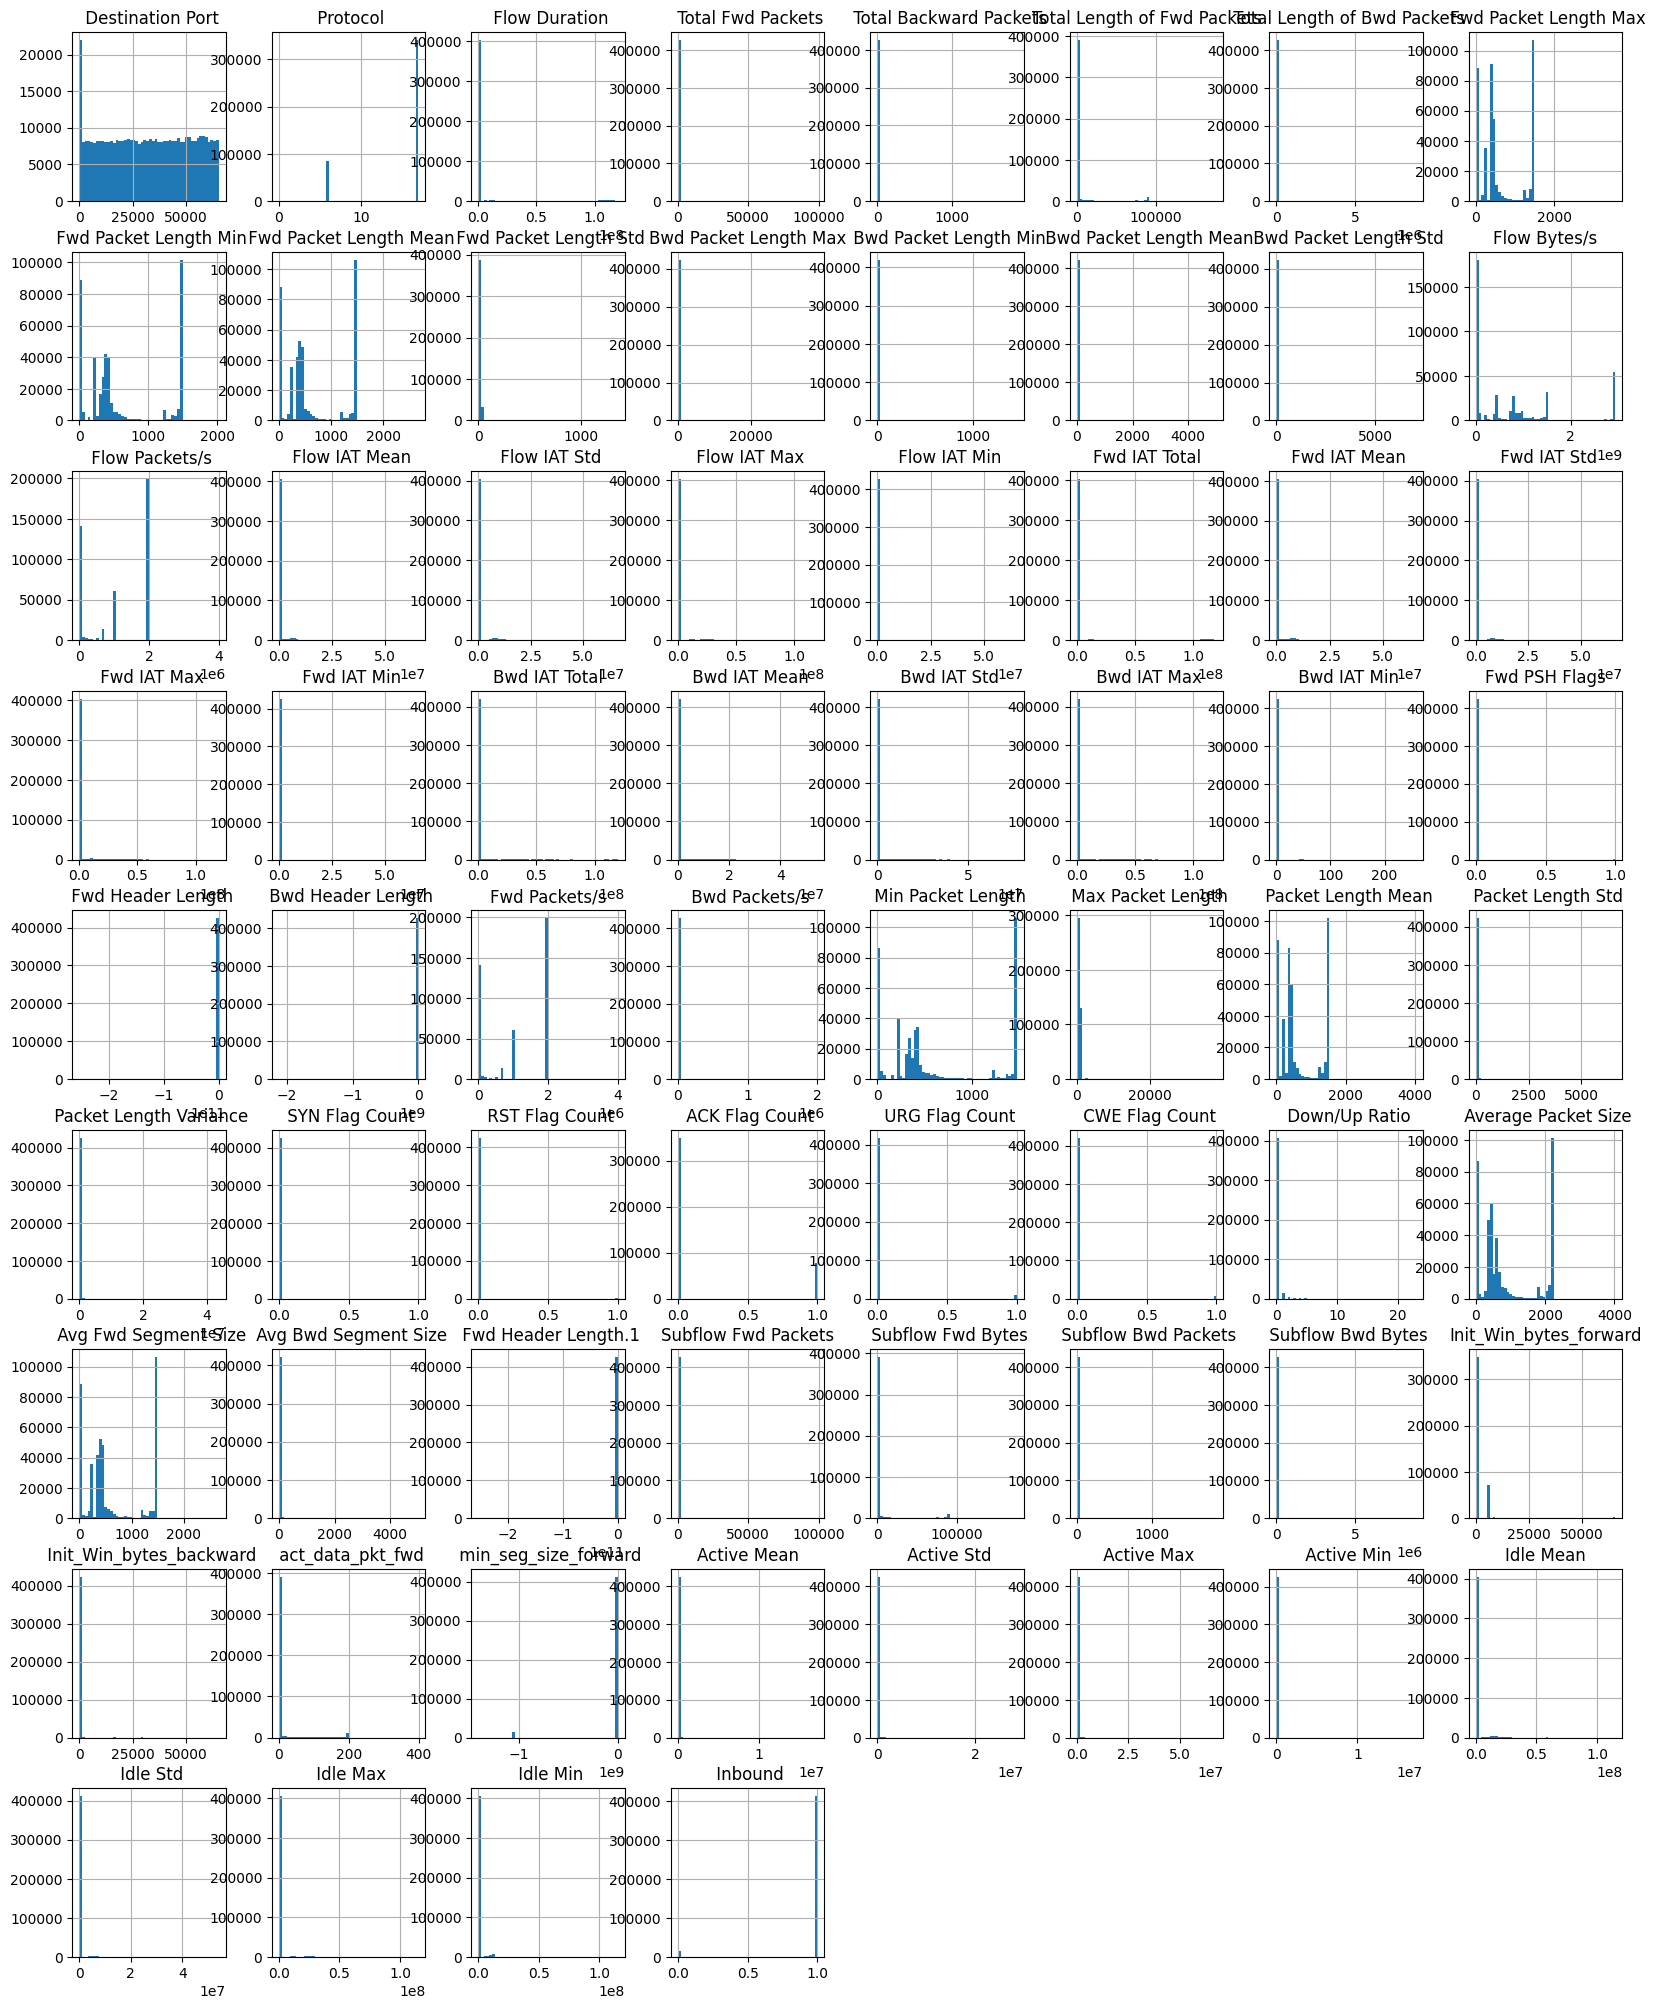

In [25]:
df.hist(bins = 50, figsize=(20, 25))
plt.show()

In [26]:
df[' Label'].unique()

array(['DrDoS_DNS', 'BENIGN', 'DrDoS_LDAP', 'DrDoS_MSSQL',
       'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP', 'Syn',
       'TFTP', 'DrDoS_UDP', 'UDP-lag', 'WebDDoS'], dtype=object)

In [27]:
df[' Label'].value_counts()

 Label
DrDoS_SSDP       39850
UDP-lag          39744
DrDoS_SNMP       39417
DrDoS_UDP        39221
DrDoS_LDAP       39064
DrDoS_MSSQL      38952
DrDoS_NetBIOS    37786
DrDoS_DNS        37420
Syn              36529
TFTP             35954
DrDoS_NTP        27447
BENIGN           14941
WebDDoS              6
Name: count, dtype: int64

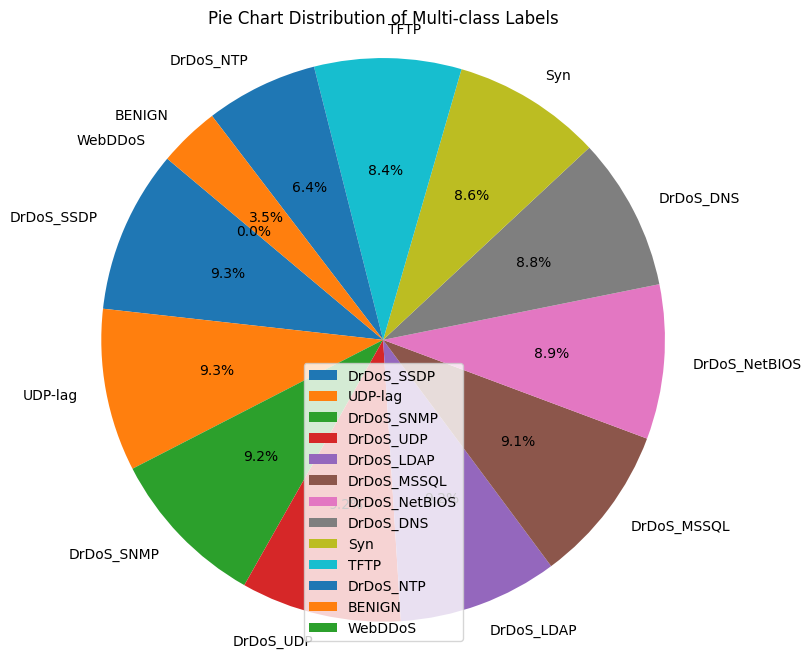

In [28]:
# Calculate value counts for the 'Label' column
label_counts = df[' Label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Distribution of Multi-class Labels')
plt.legend(loc='best')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Save the pie chart to a file
plt.savefig('Pie_chart_multi.png')

plt.show()

In [29]:
# Changing labels into numbers

df[' Label'] = df[' Label'].replace('BENIGN', '0')
df[' Label'] = df[' Label'].replace('DrDoS_DNS', '1')
df[' Label'] = df[' Label'].replace('DrDoS_LDAP', '2')
df[' Label'] = df[' Label'].replace('DrDoS_MSSQL', '3')
df[' Label'] = df[' Label'].replace('DrDoS_NetBIOS', '4')
df[' Label'] = df[' Label'].replace('DrDoS_NTP', '5')
df[' Label'] = df[' Label'].replace('DrDoS_SNMP', '6')
df[' Label'] = df[' Label'].replace('DrDoS_SSDP', '7')
df[' Label'] = df[' Label'].replace('Syn', '8')
df[' Label'] = df[' Label'].replace('TFTP', '9')
df[' Label'] = df[' Label'].replace('DrDoS_UDP', '10')
df[' Label'] = df[' Label'].replace('UDP-lag', '11')
df[' Label'] = df[' Label'].replace('WebDDoS', '12')

df[' Label'] = df[' Label'].astype('int64')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426331 entries, 0 to 426330
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             426331 non-null  int64  
 1    Protocol                     426331 non-null  int64  
 2    Flow Duration                426331 non-null  int64  
 3    Total Fwd Packets            426331 non-null  int64  
 4    Total Backward Packets       426331 non-null  int64  
 5   Total Length of Fwd Packets   426331 non-null  float64
 6    Total Length of Bwd Packets  426331 non-null  float64
 7    Fwd Packet Length Max        426331 non-null  float64
 8    Fwd Packet Length Min        426331 non-null  float64
 9    Fwd Packet Length Mean       426331 non-null  float64
 10   Fwd Packet Length Std        426331 non-null  float64
 11  Bwd Packet Length Max         426331 non-null  float64
 12   Bwd Packet Length Min        426331 non-nul

In [31]:
df.head(5)

,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,60495,17,28415,97,0,42680.0,0.0,440.0,440.0,440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1,60495,17,2,2,0,880.0,0.0,440.0,440.0,440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,46391,17,48549,200,0,88000.0,0.0,440.0,440.0,440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
3,11894,17,48337,200,0,88000.0,0.0,440.0,440.0,440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,27878,17,32026,200,0,88000.0,0.0,440.0,440.0,440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


In [32]:
from IPython.display import display
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Assuming df is your DataFrame
# Create one-hot encoded columns
encoded_labels = pd.get_dummies(df[' Label'])

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, encoded_labels], axis=1)

# Drop the original 'Label' column
df_encoded.drop([' Label'], axis=1, inplace=True)

# Display the resulting DataFrame nicely using display() function
display(df_encoded.head())

,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,SYN Flag Count,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,0,1,2,3,4,5,6,7,8,9,10,11,12
0,60495,17,28415,97,0,42680.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.502024e+06,3413.689952,295.989583,500.959301,3596.0,1.0,28415.0,295.989583,500.959301,3596.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-97.0,0,3413.689952,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,444.536083,440.0,0.0,-97.0,97,42680,0,0,-1,-1,96,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False
1,60495,17,2,2,0,880.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,4.400000e+08,1000000.000000,2.000000,0.000000,2.0,2.0,2.0,2.000000,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,-2.0,0,1000000.000000,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,660.000000,440.0,0.0,-2.0,2,880,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False
2,46391,17,48549,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.812602e+06,4119.549321,243.964824,578.101372,5418.0,1.0,48549.0,243.964824,578.101372,5418.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-200.0,0,4119.549321,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200.0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False
3,11894,17,48337,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.820552e+06,4137.617146,242.899497,485.292695,3337.0,1.0,48337.0,242.899497,485.292695,3337.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-200.0,0,4137.617146,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200.0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False
4,27878,17,32026,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,2.747767e+06,6244.925998,160.934673,196.891271,1236.0,0.0,32026.0,160.934673,196.891271,1236.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-200.0,0,6244.925998,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200.0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False


In [33]:
# Save the cleaned DataFrame to a new CSV file
file_path = "C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_visualized.csv"
df.to_csv(file_path, index=False)

print("DataFrame saved to:", file_path)

DataFrame saved to: C:\Users\user\Documents\jupyter\Enhanced IDS\Dataset\df_visualized.csv


Summary for Step 3:
- Object column (Label) has been converted to numerical form through label encoding